In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer

In [4]:
card_data = pd.read_csv('creditcard.csv\creditcard.csv')
print(card_data.shape)
X = card_data.iloc[:, :-1]
Y = card_data.iloc[:, -1]

(284807, 31)


## Data Preprocessing

In [5]:
#Split dataset into test train and valid
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify = Y, test_size = 0.25, random_state = 5)

In [6]:
ct = ColumnTransformer([
        ('std', StandardScaler(), ['Amount', 'Time'])
    ], remainder='passthrough')
x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)

In [7]:
weight_nf = y_train.value_counts()[0] / len(y_train)
weight_f = y_train.value_counts()[1] / len(y_train)
print(f"Non-Fraud weight: {weight_nf}")
print(f"Fraud weight: {weight_f}")

Non-Fraud weight: 0.9982725123475574
Fraud weight: 0.0017274876524425926


In [8]:
print(f"Train Data shape: {x_train.shape} Train Class Data shape: {y_train.shape}")
print(f"Test Data shape: {x_test.shape} Test Class Data shape: {y_test.shape}")

Train Data shape: (213605, 30) Train Class Data shape: (213605,)
Test Data shape: (71202, 30) Test Class Data shape: (71202,)


In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score, matthews_corrcoef


def print_classification_result(true, predict):
    print(f"Accuracy Score: {accuracy_score(true, predict) * 100:.2f}%")
    print(f"Confusion Matrix: \n {confusion_matrix(true, predict)}\n")
    print(f"MCC_Score:{matthews_corrcoef(true, predict)}\n")
    print(f"f1_score: \n {f1_score(true, predict)}\n")
    print(f"recall_score: \n {recall_score(true, predict)}\n")
    print(f"Precision_Score:{precision_score(true, predict)}")

In [43]:
x_train = np.array(x_train).reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = np.array(x_test).reshape(x_test.shape[0], x_test.shape[1], 1)

## Convolution Neural Network

In [74]:
cnn = tf.keras.models.Sequential()

In [75]:
cnn.add(tf.keras.layers.Conv1D(filters = 64, kernel_size = 3, activation = 'relu', input_shape = [30, 1]))
cnn.add(tf.keras.layers.MaxPool1D(pool_size = 2, strides = 1))

In [76]:
cnn.add(tf.keras.layers.Conv1D(filters = 64, kernel_size = 2, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool1D(pool_size = 2, strides = 1))

In [77]:
cnn.add(tf.keras.layers.Flatten())

In [78]:
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

In [79]:
cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [80]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [81]:
loss = cnn.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = 1, validation_split=0.3)

Epoch 1/10
4673/4673 [==============================] - 17s 4ms/step - loss: 0.0068 - accuracy: 0.9990 - val_loss: 0.0039 - val_accuracy: 0.9991
Epoch 2/10
4673/4673 [==============================] - 15s 3ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0046 - val_accuracy: 0.9993
Epoch 3/10
4673/4673 [==============================] - 15s 3ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0039 - val_accuracy: 0.9992
Epoch 4/10
4673/4673 [==============================] - 15s 3ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0040 - val_accuracy: 0.9992
Epoch 5/10
4673/4673 [==============================] - 14s 3ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0044 - val_accuracy: 0.9991
Epoch 6/10
4673/4673 [==============================] - 15s 3ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 7/10
4673/4673 [==============================] - 16s 4ms/step - loss: 0.0044 - accuracy: 0.9994 - val_loss: 0.0034 - val_ac

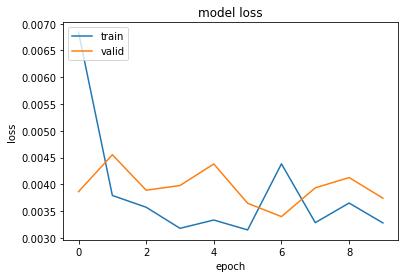

In [82]:
plt.plot(loss.history['loss'])
plt.plot(loss.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [83]:
y_pred = cnn.predict(x_test)
y_pred = np.round(y_pred)
print_classification_result(y_test, y_pred)

Accuracy Score: 99.93%
Confusion Matrix: 
 [[71069    10]
 [   38    85]]

MCC_Score:0.786014611164846

f1_score: 
 0.7798165137614679

recall_score: 
 0.6910569105691057

Precision_Score:0.8947368421052632


## Parameter Testing

In [31]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv1D(filters = 64, kernel_size = 4, activation = 'relu', input_shape = [x_train.shape[1], 1]))
cnn.add(tf.keras.layers.MaxPool1D(pool_size = 2, strides = 1))
cnn.add(tf.keras.layers.Conv1D(filters = 64, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool1D(pool_size = 2, strides = 1))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [32]:
loss = cnn.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = 1, validation_split = 0.3)

Epoch 1/10
4673/4673 [==============================] - 15s 3ms/step - loss: 0.0079 - accuracy: 0.9990 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 2/10
4673/4673 [==============================] - 13s 3ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 3/10
4673/4673 [==============================] - 12s 3ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 4/10
4673/4673 [==============================] - 13s 3ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9992
Epoch 5/10
4673/4673 [==============================] - 13s 3ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 6/10
4673/4673 [==============================] - 12s 3ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0050 - val_accuracy: 0.9988
Epoch 7/10
4673/4673 [==============================] - 12s 3ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0049 - val_ac

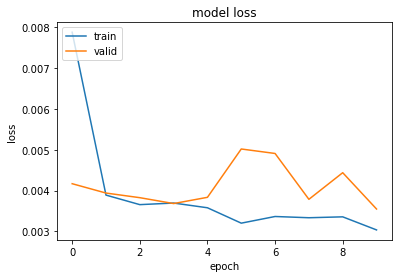

In [33]:
plt.plot(loss.history['loss'])
plt.plot(loss.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [34]:
y_pred = cnn.predict(x_test)
y_pred = np.round(y_pred)
print_classification_result(y_test, y_pred)

Accuracy Score: 99.93%
Confusion Matrix: 
 [[71062    17]
 [   30    93]]

MCC_Score:0.7992026954829927

f1_score: 
 0.7982832618025751

recall_score: 
 0.7560975609756098

Precision_Score:0.8454545454545455


In [35]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv1D(filters = 128, kernel_size = 3, activation = 'relu', input_shape = [x_train.shape[1], 1]))
cnn.add(tf.keras.layers.MaxPool1D(pool_size = 2, strides = 1))
cnn.add(tf.keras.layers.Conv1D(filters = 128, kernel_size = 2, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool1D(pool_size = 2, strides = 1))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [36]:
loss = cnn.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = 1, validation_split = 0.3)

Epoch 1/10
4673/4673 [==============================] - 25s 5ms/step - loss: 0.0065 - accuracy: 0.9989 - val_loss: 0.0052 - val_accuracy: 0.9992
Epoch 2/10
4673/4673 [==============================] - 25s 5ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 3/10
4673/4673 [==============================] - 25s 5ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0047 - val_accuracy: 0.9992
Epoch 4/10
4673/4673 [==============================] - 25s 5ms/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 0.0043 - val_accuracy: 0.9992
Epoch 5/10
4673/4673 [==============================] - 25s 5ms/step - loss: 0.0038 - accuracy: 0.9994 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 6/10
4673/4673 [==============================] - 26s 6ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 7/10
4673/4673 [==============================] - 25s 5ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0043 - val_ac

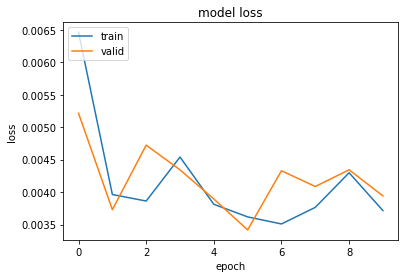

In [37]:
plt.plot(loss.history['loss'])
plt.plot(loss.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [38]:
y_pred = cnn.predict(x_test)
y_pred = np.round(y_pred)
print_classification_result(y_test, y_pred)

Accuracy Score: 99.94%
Confusion Matrix: 
 [[71063    16]
 [   26    97]]

MCC_Score:0.822480152960686

f1_score: 
 0.8220338983050847

recall_score: 
 0.7886178861788617

Precision_Score:0.8584070796460177


In [39]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv1D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [x_train.shape[1], 1]))
cnn.add(tf.keras.layers.MaxPool1D(pool_size = 2, strides = 1))
cnn.add(tf.keras.layers.Conv1D(filters = 32, kernel_size = 2, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool1D(pool_size = 2, strides = 1))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [40]:
loss = cnn.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = 1, validation_split = 0.3)

Epoch 1/10
4673/4673 [==============================] - 9s 2ms/step - loss: 0.0057 - accuracy: 0.9991 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 2/10
4673/4673 [==============================] - 9s 2ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0045 - val_accuracy: 0.9993
Epoch 3/10
4673/4673 [==============================] - 9s 2ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0035 - val_accuracy: 0.9993
Epoch 4/10
4673/4673 [==============================] - 9s 2ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 5/10
4673/4673 [==============================] - 9s 2ms/step - loss: 0.0030 - accuracy: 0.9995 - val_loss: 0.0035 - val_accuracy: 0.9993
Epoch 6/10
4673/4673 [==============================] - 9s 2ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0038 - val_accuracy: 0.9992
Epoch 7/10
4673/4673 [==============================] - 9s 2ms/step - loss: 0.0029 - accuracy: 0.9995 - val_loss: 0.0038 - val_accuracy:

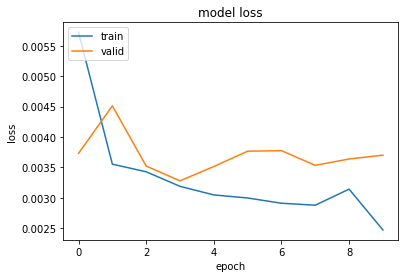

In [41]:
plt.plot(loss.history['loss'])
plt.plot(loss.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [42]:
y_pred = cnn.predict(x_test)
y_pred = np.round(y_pred)
print_classification_result(y_test, y_pred)

Accuracy Score: 99.95%
Confusion Matrix: 
 [[71074     5]
 [   34    89]]

MCC_Score:0.8274518357689021

f1_score: 
 0.8202764976958526

recall_score: 
 0.7235772357723578

Precision_Score:0.9468085106382979
